In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project
### Part 3 of Processing Pipeline

This notebook is intended to document analysis of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election- the 10 Democratic primary debates, the 12 Republican primary debates, and the debates for the general election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project. The citations for these transcripts can be found in the README. Using these transcripts I'll analyze the referring expressions the candidates use for each other. 


We have two factors at play: gender and experience. Hillary Clinton and Carly Fiorina are the only two female candidates. Clinton has several titles due to her experience in politics, and Fiorina has no professional titles other than Mrs. because she has no political experience. We can compare how the two are referred to by looking at being called a professional title (Senator or Secretary for Clinton; Mrs. or Businesswoman for Fiorina) or by their first name only or first and last name. 

There is a similar situation among the male candidates. Donald Trump is the only male candidate without a professional title other than Mr. Therefore, we can try and see if there are differences in the ways the moderators and candidates refer to those with or without government experience and if there are differences in the ways the male and female candidates are referred to. Does the frequency of being called by a first name or without a title have to do with gender? Or does it have to do with experience?

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

In [3]:
f = open('/Users/Paige/Documents/Data_Science/link_dict.pkl', 'rb')
link_dict = pickle.load(f)
f.close()

In [4]:
f = open('/Users/Paige/Documents/Data_Science/master_df.pkl', 'rb')
master_df = pickle.load(f)
f.close
master_df = master_df.reset_index(drop=True)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),..."
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J..."
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN..."
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin..."
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face..."


**First, I'm going to create a mapping function that will make it easier to see if a person is being talked about in a particular utterance. This function is just going to create a set of all of the entity labels that appear in the tree. Then, to see if a person is being referred to in a particular utterance, we can just see if they are in that set instead of traversing the tree each time.**

In [5]:
def entity_tracking(tree):
    name = ''
    referred_to = []
    entities = set(link_dict.values())
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in entities:
                referred_to.append(chunk.label())
                    
    return list(set(referred_to))

In [6]:
master_df['Entities'] = master_df.Tree.map(entity_tracking)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),...",[]
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J...",[]
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN...","[Neil Cavuto, Maria Bartiromo]"
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin...",[]
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face...",[]


**Let's see how many times each relevant entity was referred to throughout all of the debates:**

In [7]:
ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label') and chunk.label() not in ['GPE', 'ORGANIZATION', 'PERSON', 'LOCATION', 'GSP', 'FACILITY' ]:
            ner_categories[chunk.label()] += 1
for category in sorted(ner_categories, key=ner_categories.get, reverse=True):
    print(category, ner_categories[category])

Hillary Clinton 1060
Donald Trump 950
Barack Obama 540
Bernie Sanders 535
Marco Rubio 350
Ted Cruz 319
John Kasich 246
Jeb Bush 238
Chris Christie 205
Ben Carson 202
TITLE 197
Bashar al-Assad 137
Ronald Reagan 135
Rand Paul 114
Martin O'Malley 110
Vladimir Putin 105
Carly Fiorina 85
Dana Bash 67
Jake Tapper 66
Anderson Cooper 65
Wolf Blitzer 59
John Kerry 46
Muammar Gaddafi 46
Maria Celeste Arraras 45
Martha Raddatz 45
Megyn Kelly 41
David Muir 40
Mike Huckabee 38
George W. Bush 37
Jim Webb 33
Lester Holt 32
Bill Clinton 30
Scott Walker 30
Bret Baier 29
Saddam Hussein 28
Neil Cavuto 27
Mitt Romney 26
Andrea Mitchell 19
Osama bin Laden 18
Don Lemon 17
Jeff Sessions 17
Chuck Schumer 16
Edward Snowden 16
Hugh Hewitt 15
Nancy Pelosi 14
Antonin Scalia 14
John McCain 13
Joe Biden 12
Carl Quintanilla 12
Sean Hannity 12
Rachel Maddow 12
NICKNAME 11
Nikki Haley 10
Lindsey Graham 10
Benjamin Netanyahu 10
Kim Jong Un 10
James Carter 9
George Bush 8
Theodore Roosevelt 8
Abraham Lincoln 8
Fidel Cas

**Here is a distribution across the candidates that remained in the race until the last primary debate.**

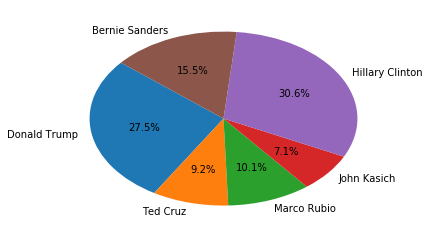

In [8]:
#This section is with help from a datacamp tutorial
#https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/named-entity-recognition?ex=3

ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in ['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'Ted Cruz', 'Marco Rubio', 'John Kasich']:
                ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

**We see that Hillary Clinton is talked about the most, followed by Trump, Sanders, Rubio, Cruz, and Kasich. It makes sense that Hillary Clinton is addressed/referred to the most often because she made it through the Democratic primary debates and then into the general election debates. The Democratic party only ever had at most 5 candidates running, while the Republican party had at most 17 candidates running. That means that each candidate who was a Democrat had more opportunities in each debate to speak than the Republican candidates simply because there were less of them.**

**Let's build a data frame for each speaker with only their utterances in it.**

In [9]:
#There are 89 different speakers
speaker_counts = master_df['Speaker'].value_counts()
speaker_counts.size

89

In [10]:
#These are the top 20 speakers who had the most utterances. A larger count doesn't necissarily 
#mean a speaker spoke for more time than another, just that they had more utterances.
speaker_counts[:20]

TRUMP        6013
CLINTON      4890
SANDERS      3545
RUBIO        2617
CRUZ         2117
KASICH       1977
BUSH         1461
OMALLEY      1073
CHRISTIE     1018
CARSON        974
COOPER        792
BLITZER       756
PAUL          752
TAPPER        677
WALLACE       652
FIORINA       614
KELLY         493
MUIR          488
DICKERSON     481
HOLT          416
Name: Speaker, dtype: int64

In [11]:
speakers = list(speaker_counts.index)
speakers

['TRUMP', 'CLINTON', 'SANDERS', 'RUBIO', 'CRUZ', 'KASICH', 'BUSH', 'OMALLEY', 'CHRISTIE', 'CARSON', 'COOPER', 'BLITZER', 'PAUL', 'TAPPER', 'WALLACE', 'FIORINA', 'KELLY', 'MUIR', 'DICKERSON', 'HOLT', 'RADDATZ', 'BAIER', 'CUOMO', 'BASH', 'HUCKABEE', 'BARTIROMO', 'CAVUTO', 'WALKER', 'HEWITT', 'QUESTION', 'TODD', 'WEBB', 'QUINTANILLA', 'CHAFEE', 'QUICK', 'HARWOOD', 'RAMOS', 'MADDOW', 'SALINAS', 'BAKER', 'WOODRUFF', 'IFILL', 'MITCHELL', 'LEMON', 'TUMULTY', 'GARRETT', 'CORDES', 'LOUIS', 'MCELVEEN', 'HAM', 'DINAN', 'STRASSEL', 'UNKNOWN', 'UNIDENTIFIED', 'COONEY', 'LOPEZ', 'EPPERSON', 'OBRADOVICH', 'SANTELLI', 'CRAMER', 'ANNOUNCER', 'LEVESQUE', 'GOODSON', 'BROWNLEE', 'FRANCHESCA', 'BISHOP', 'FRANTA', 'JENNA', 'CRAWFORD', 'SMITH', 'MODERATOR', 'AUDIENCE', 'PANELISTS', 'LASSEN', 'PERRY', 'ARNOLD', 'ALEXIS', 'PLUMMER', 'ROSENGREN', 'SEAN', 'WILKINS', 'DICK', 'BRETT', 'JOY', 'MALE', 'UNIDENTIFIABLE', 'DEBORAH', 'COLLISON', 'HANNITY']

In [12]:
speaker_dfs = []
for speaker in speakers:
    df = master_df.loc[master_df['Speaker']==speaker, :]
    speaker_dfs.append(df)

**First, let's focus on the candidates. The ultimate goal of this project is to focus on the referring expressions Hillary Clinton and Donald Trump use for each other, but analyzing how they refer to other candidates, and other candidates them can be helpful in comparison.**

In [13]:
trump = speaker_dfs[0]
clinton = speaker_dfs[1]
sanders = speaker_dfs[2]
rubio = speaker_dfs[3]
cruz = speaker_dfs[4]
kasich = speaker_dfs[5]
bush = speaker_dfs[6]
omalley = speaker_dfs[7]
christie = speaker_dfs[8]
carson = speaker_dfs[9]
paul = speaker_dfs[12]
fiorina = speaker_dfs[15]
huckabee = speaker_dfs[24]
walker = speaker_dfs[27]
webb = speaker_dfs[31]
chafee = speaker_dfs[33]

In [14]:
trump.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
170,1-14-16,primary_rep,TRUMP,"It's not fear and terror, it's reality.","[(It, PRP), ('s, VBZ), (not, RB), (fear, JJ), ...",[]
171,1-14-16,primary_rep,TRUMP,"You just have to look today at Indonesia, bomb...","[(You, PRP), (just, RB), (have, VBP), (to, TO)...",[]
172,1-14-16,primary_rep,TRUMP,"[applause]\n\nYou look at California, you look...","[([, NN), (applause, NN), (], NNP), (You, PRP)...",[]
173,1-14-16,primary_rep,TRUMP,"They're very, very badly wounded.","[(They, PRP), ('re, VBP), (very, RB), (,, ,), ...",[]
174,1-14-16,primary_rep,TRUMP,They will — some will follow.,"[(They, PRP), (will, MD), (—, VB), (some, DT),...",[]


In [15]:
clinton.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
1617,1-17-16,primary_dem,CLINTON,"Well, good evening.","[(Well, RB), (,, ,), (good, JJ), (evening, NN)...",[]
1618,1-17-16,primary_dem,CLINTON,And I want to thank the Congressional Black Ca...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (...",[]
1619,1-17-16,primary_dem,CLINTON,"You know, I remember well when my youth minist...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), (r...",[]
1620,1-17-16,primary_dem,CLINTON,I was a teenager.,"[(I, PRP), (was, VBD), (a, DT), (teenager, NN)...",[]
1621,1-17-16,primary_dem,CLINTON,"And his moral clarity, the message that he con...","[(And, CC), (his, PRP$), (moral, JJ), (clarity...",[]


**First, we're going to get some stats.**

In [16]:
trump[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,6013,6013,6013,6013,6013
unique,14,2,1,5606,5541
top,9-26-16,primary_rep,TRUMP,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,751,3979,6013,89,89


In [17]:
clinton[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,4890,4890,4890,4890,4890
unique,13,2,1,4686,4672
top,4-14-16,primary_dem,CLINTON,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,495,3660,4890,118,118


**These descriptions show that out of all of the debates, Trump had his most utterances in the 9-26-16 debate, and Clinton had her most utterances in the 4-14-16 debate. The most frequent "utterance" by both of these candidates was the transcription for applause. Based on these transcriptions, Clinton was applauded 118 times while Trump was applauded 89 times. Out of Trump's 6013 utterances, 5606 of those were unique. Somehow, there are less unique trees (5541) than there are unique utterances. I'm not quite sure how that is. Out of Clinton's 4890 utterances, 4686 of those were unique, and there are only 4672 unique trees.**

**Defining some functions:**

In [18]:
#This function returns a set of all of the relevant entities a given speaker refers to.
def get_entities(entities):
    all_ents = []
    for entity_list in entities:
        for ent in entity_list:
            all_ents.append(ent)
    return set(all_ents)

In [19]:
#This function returns a list of REs a speaker used to describe a given entity.
def get_RE_for_label(trees, label):
    name = ''
    REs = []
    RE_trees = []
    ents=set(link_dict.values())
    for tree in trees:
        for chunk in tree:
            if hasattr(chunk, 'label'):
                if label == 'all':
                    if chunk.label() in ents:
                        for leaf in chunk.leaves():
                            name+=' '+str(leaf[0])
                        name = name.strip()
                        REs.append(name)
                        name = ''
                    else:
                        name = ''
                else:
                    if chunk.label()==label:
                        for leaf in chunk.leaves():
                            name+=' '+str(leaf[0])
                        name = name.strip()
                        REs.append(name)
                        name = ''
                    else:
                        name = ''
    return REs

In [20]:
def get_re_type_freq(re_map, freq_dict):
    re_freq_dict = {}
    for key in re_map:
        if key in freq_dict.keys():
            if re_map[key] in re_freq_dict.keys():
                re_freq_dict[re_map[key]] += freq_dict[key]
            else:
                re_freq_dict[re_map[key]] = freq_dict[key]
    return re_freq_dict

In [21]:
#This function takes a data frame, and entity label, and a specific RE and returns all rows with that specific RE in it
#If no RE is passed in, any rows about the entity specified will be returned
def get_trees_for(df, label, RE=''):
    name = ''
    REs = []
    RE_trees = []
    df2 = pd.DataFrame(columns=['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree'])
    row=0
    if RE == '':
        for ent_list in df['Entities']:
            if label in ent_list:
                df2.loc[row]=(df.iloc[row][:])
            row+=1
    else:
        for tree in df['Tree']:
            for chunk in tree:
                if hasattr(chunk, 'label'):
                    if chunk.label()==label:
                        for leaf in chunk.leaves():
                            name+=' '+str(leaf[0])
                        name = name.strip()
                        if name == RE:
                            df2.loc[row]=(df.iloc[row][:])
                        name = ''
                    else:
                        name = ''
            row +=1
    return df2


**Let's categorize the ways a person can be referred to into different types. I will define the types as follows:**

**PROFESSIONAL- Senator, Secretary, Businessman, Dr., Governor, etc.**

**FIRST NAME- Hillary, Donald, etc.**

**FULL NAME- Hillary Clinton, Donald Trump, etc.**

**LAST NAME- Clinton, Trump, etc.**

**GENDERED- Mrs., Ms., Miss, Mr. (Only if they posess an alternate professional title)**

**NAMECALLING- any form of namecalling**

**I'm going to find all of the ways Hillary Clinton and Donald Trump are referred to by anyone who participated in the debates.**

In [22]:
master_REclinton = get_RE_for_label(master_df['Tree'], 'Hillary Clinton')
set(master_REclinton)

{'Hillary', 'Madam Secretary', 'Secretary Hillary Clinton', 'Secretary Clinton', 'Hill', 'Hillary Rodham Clinton', 'Hillary Clinton', 'Senator Clinton', 'President Clinton', 'Mrs. Clinton', 'Hilary Clinton', 'Clinton'}

In [23]:
master_REclinton_freq = {re: master_REclinton.count(re) for re in master_REclinton}
master_REclinton_freq

{'Secretary Clinton': 590, 'Hillary Clinton': 310, 'Hillary': 64, 'Hillary Rodham Clinton': 3, 'Clinton': 50, 'Secretary Hillary Clinton': 4, 'President Clinton': 13, 'Mrs. Clinton': 12, 'Madam Secretary': 6, 'Hill': 1, 'Senator Clinton': 6, 'Hilary Clinton': 1}

In [24]:
len(master_REclinton_freq)

12

**The length of this dictionary is 12, but since President Clinton is most likely tagging error that's difficult to fix (actually referring to President Bill Clinton). Let's take a look at these to be sure.**

In [25]:
master_presclinton = get_trees_for(master_df, 'Hillary Clinton', 'President Clinton')
master_presclinton

,Date,Debate Type,Speaker,Sents,Tree
2538,1-17-16,primary_dem,HOLT,You have said that President Clinton would adv...,"[(You, PRP), (have, VBP), (said, VBD), (that, ..."
2755,1-25-16,primary_dem,CUOMO,"And, if you do a checklist of how you pay for ...","[(And, CC), (,, ,), (if, IN), (you, PRP), (do,..."
5922,10-13-15,primary_dem,SANDERS,"Well, obviously, I voted, when President Clin...","[(Well, RB), (,, ,), (obviously, RB), (,, ,), ..."
6065,10-13-15,primary_dem,SANDERS,I supported President Clinton's effort to deal...,"[(I, PRP), (supported, VBD), [(President, NNP)..."
8145,10-19-16,general,WALLACE,"Secondly, if you impose a no-fly zone and a Ru...","[(Secondly, RB), (,, ,), (if, IN), (you, PRP),..."
10222,10-9-16,general,TRUMP,"But what President Clinton did, he was impeach...","[(But, CC), (what, WP), [(President, NNP), (Cl..."
11454,11-10-15,primary_rep,BARTIROMO,"Governor Kasich, you have spoken much about yo...","[[(Governor, NNP), (Kasich, NNP)], (,, ,), (yo..."
11575,11-10-15,primary_rep,BAKER,"Under President Clinton, the economy added abo...","[(Under, IN), [(President, NNP), (Clinton, NNP..."
30197,3-9-16,primary_dem,CLINTON,"You know, in the debates we've had — maybe thi...","[(You, PRP), (know, VBP), (,, ,), (in, IN), (t..."
30214,3-9-16,primary_dem,SANDERS,"[laughter]\n\nNow, when we talk about the poli...","[([, JJ), (laughter, NN), (], NN), (Now, RB), ..."


**As expected, these all appear to be tagging mistakes, so we will ignore these.**

**In addition to Hilary Clinton being a mispelling, there are only 10 ways of referring to Hillary Clinton. That being said, I can categorize these RE's into the categories described above very easily by hand.**

**Madam Secretary could be considered professional because it has information about her previous job, but the use of "Madam" instead of just saying "Secretary" when that would suffice just as well makes this RE gendered. The use of Clinton's full name, including her maiden name (Hillary Rodham Clinton), could be an interesting case. I'm going to look at these three instances closer.**

In [26]:
master_rodham = get_trees_for(master_df, 'Hillary Clinton', 'Hillary Rodham Clinton')
master_rodham

,Date,Debate Type,Speaker,Sents,Tree
435,1-14-16,primary_rep,CHRISTIE,"He's a good guy, a smart guy, and he would be ...","[(He, PRP), ('s, VBZ), (a, DT), (good, JJ), (g..."
1277,1-14-16,primary_rep,CHRISTIE,And I'm the only one up on this stage who back...,"[(And, CC), (I, PRP), ('m, VBP), (the, DT), (o..."
4340,1-28-16,primary_rep,CHRISTIE,Hillary Rodham Clinton did that to our country.,"[[(Hillary, NNP), (Rodham, NNP), (Clinton, NNP..."


**Interesting. Chris Christie is the only one to use Hillary Clinton's maiden name.**

In [27]:
clinton_re_maps = {'Secretary Clinton': 'PROFESSIONAL', 'Hillary Clinton': "FULL NAME", 'Hillary': "FIRST NAME", 'Hillary Rodham Clinton': "FULL NAME", 'Clinton': "LAST NAME", 'Secretary Hillary Clinton': "PROFESSIONAL", 'Mrs. Clinton': "GENDERED", 'Madam Secretary': "GENDERED", 'Hill': "FIRST NAME", 'Senator Clinton': "PROFESSIONAL", 'Hilary Clinton': "FULL NAME"}
clinton_re_maps

{'Secretary Clinton': 'PROFESSIONAL', 'Hillary Clinton': 'FULL NAME', 'Hillary': 'FIRST NAME', 'Hillary Rodham Clinton': 'FULL NAME', 'Clinton': 'LAST NAME', 'Secretary Hillary Clinton': 'PROFESSIONAL', 'Mrs. Clinton': 'GENDERED', 'Madam Secretary': 'GENDERED', 'Hill': 'FIRST NAME', 'Senator Clinton': 'PROFESSIONAL', 'Hilary Clinton': 'FULL NAME'}

In [28]:
clinton_freq = get_re_type_freq(clinton_re_maps, master_REclinton_freq)
clinton_freq

{'PROFESSIONAL': 600, 'FULL NAME': 314, 'FIRST NAME': 65, 'LAST NAME': 50, 'GENDERED': 18}

**Let's do the same for Donald Trump and map his REs.**

In [29]:
master_REtrump = get_RE_for_label(master_df['Tree'], 'Donald Trump')
set(master_REtrump)

{'President Trump', 'Trump', 'Donald', 'Donald J. Trump', 'Mr. Trmup', 'Mr. Trump', 'Senator Trump', 'Donald Trump', 'Businessman Donald Trump', 'Mr. Donald Trump'}

In [30]:
master_REtrump_freq = {re: master_REtrump.count(re) for re in master_REtrump}
master_REtrump_freq

{'Businessman Donald Trump': 2, 'Mr. Trump': 458, 'Donald Trump': 176, 'Donald': 252, 'Donald J. Trump': 6, 'Trump': 47, 'President Trump': 4, 'Mr. Trmup': 1, 'Mr. Donald Trump': 3, 'Senator Trump': 1}

**That Senator Trump is weird because Donald Trump was never a senator. Let's see what's up with that.**

In [31]:
master_sentrump = get_trees_for(master_df, 'Donald Trump', 'Senator Trump')
master_sentrump

,Date,Debate Type,Speaker,Sents,Tree
25524,3-10-16,primary_rep,HEWITT,Senator Trump...[crosstalk],"[[(Senator, NNP), (Trump, NNP)], (..., :), ([,..."


In [32]:
master_df.loc[25520:25530][:]

,Date,Debate Type,Speaker,Sents,Tree,Entities
25520,3-10-16,primary_rep,TRUMP,But I would like to at least have the other si...,"[(But, CC), (I, PRP), (would, MD), (like, VB),...",[]
25521,3-10-16,primary_rep,TRUMP,Maybe we can get a deal.,"[(Maybe, RB), (we, PRP), (can, MD), (get, VB),...",[]
25522,3-10-16,primary_rep,TRUMP,I think it's probably the toughest negotiation...,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25523,3-10-16,primary_rep,TRUMP,But maybe we can get a deal done.,"[(But, CC), (maybe, RB), (we, PRP), (can, MD),...",[]
25524,3-10-16,primary_rep,HEWITT,Senator Trump...[crosstalk],"[[(Senator, NNP), (Trump, NNP)], (..., :), ([,...",[Donald Trump]
25525,3-10-16,primary_rep,TRUMP,"And, by the way, just so you understand, as f...","[(And, CC), (,, ,), (by, IN), (the, DT), (way,...",[]
25526,3-10-16,primary_rep,TRUMP,I think it's maybe the world deal I've ever seen.,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25527,3-10-16,primary_rep,TRUMP,I think it's the worst deal I've ever seen neg...,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25528,3-10-16,primary_rep,TRUMP,I will be so tough on them and ultimately that...,"[(I, PRP), (will, MD), (be, VB), (so, RB), (to...",[]
25529,3-10-16,primary_rep,TRUMP,That deal will be broken.,"[(That, DT), (deal, NN), (will, MD), (be, VB),...",[]


**Looks like it wasn't a tagging mistake. It was a slip of the tongue.**

In [33]:
len(master_REtrump_freq)

10

**The length of this dictionary is 10, but since one of these keys 'Mr. Trmup', is just a typo, we will say Donald Trump is only referred to in 9 different ways throughout this entire corpus. There is only one more RE for Clinton than there are for Trump. I expected there to be more variation in the ways speakers refer to Clinton because she has had many different titles over the course of her career (Senator, Secretary, First Lady), she has a maiden name, and there are two common titles to refer to married women (Ms. and Mrs.) as opposed to one title for men (Mr.). ****

**The line between professional title and gendered title gets a little fuzzy with Donald Trump because of his lack of political experience. His professional title is simply Mr., which is inherently gendered. I have decided to define Mr. as professional in this case because of a lack of any other term.**

In [34]:
trump_re_maps = {'Businessman Donald Trump': 'PROFESSIONAL', 'Mr. Trump': 'PROFESSIONAL', 'Donald Trump': 'FULL NAME', 'Donald': 'FIRST NAME', 'Donald J. Trump': 'FULL NAME', 'Trump': 'LAST NAME', 'President Trump': 'PROFESSIONAL', 'Mr. Trmup': 'PROFESSIONAL', 'Mr. Donald Trump': 'PROFESSIONAL', 'Senator Trump': 'PROFESSIONAL'}
trump_re_maps

{'Businessman Donald Trump': 'PROFESSIONAL', 'Mr. Trump': 'PROFESSIONAL', 'Donald Trump': 'FULL NAME', 'Donald': 'FIRST NAME', 'Donald J. Trump': 'FULL NAME', 'Trump': 'LAST NAME', 'President Trump': 'PROFESSIONAL', 'Mr. Trmup': 'PROFESSIONAL', 'Mr. Donald Trump': 'PROFESSIONAL', 'Senator Trump': 'PROFESSIONAL'}

In [35]:
trump_freq = get_re_type_freq(trump_re_maps, master_REtrump_freq)
trump_freq

{'PROFESSIONAL': 469, 'FULL NAME': 182, 'FIRST NAME': 252, 'LAST NAME': 47}

**Let's do the same for Carly Fiorina since she is the only other female candidate and she also does not have a political title, and then for all of the candidates who made it to the last primary debate.**

#### Carly Fiorina

In [36]:
master_REfiorina = get_RE_for_label(master_df['Tree'], 'Carly Fiorina')
set(master_REfiorina)

{'Businesswoman Carly Fiorina', 'Fiorina', 'Carly', 'Mrs. Fiorina', 'President Fiorina', 'Carly Fiorina'}

In [37]:
master_REfiorina_freq = {re: master_REfiorina.count(re) for re in master_REfiorina}
master_REfiorina_freq

{'Carly Fiorina': 17, 'Mrs. Fiorina': 17, 'Fiorina': 38, 'Businesswoman Carly Fiorina': 1, 'Carly': 10, 'President Fiorina': 2}

In [38]:
fiorina_re_maps = {'Carly Fiorina': "FULL NAME", 'Mrs. Fiorina': "PROFESSIONAL", 'Fiorina': "LAST NAME", 'Businesswoman Carly Fiorina': "PROFESSIONAL", 'Carly': "FIRST NAME", 'President Fiorina': "PROFESSIONAL"}
fiorina_re_maps

{'Carly Fiorina': 'FULL NAME', 'Mrs. Fiorina': 'PROFESSIONAL', 'Fiorina': 'LAST NAME', 'Businesswoman Carly Fiorina': 'PROFESSIONAL', 'Carly': 'FIRST NAME', 'President Fiorina': 'PROFESSIONAL'}

In [39]:
fiorina_freq = get_re_type_freq(fiorina_re_maps, master_REfiorina_freq)
fiorina_freq

{'FULL NAME': 17, 'PROFESSIONAL': 20, 'LAST NAME': 38, 'FIRST NAME': 10}

#### Bernie Sanders

In [40]:
master_REsanders = get_RE_for_label(master_df['Tree'], 'Bernie Sanders')
set(master_REsanders)

{'Senator Bernie Sanders', 'Bernie', 'President Sanders', 'Bernie Sanders', 'Sanders', 'Secretary Sanders', 'Governor Sanders', 'Vermont Bernie Sanders', 'Senator Sander', 'Senator Sanders'}

In [41]:
master_REsanders_freq = {re: master_REsanders.count(re) for re in master_REsanders}
master_REsanders_freq

{'Senator Bernie Sanders': 8, 'Bernie': 13, 'Bernie Sanders': 61, 'Senator Sanders': 418, 'Governor Sanders': 1, 'Sanders': 21, 'President Sanders': 8, 'Secretary Sanders': 3, 'Senator Sander': 1, 'Vermont Bernie Sanders': 1}

In [42]:
#There are some REs in here that are typos, and some where people just used incorrect titles (Secretary Sanders)
#We are still going to map those to professional
sanders_re_maps = {'Senator Bernie Sanders': "PROFESSIONAL", 'Bernie': "FIRST NAME", 'Bernie Sanders': "FULL NAME", 'Senator Sanders': "PROFESSIONAL", 'Governor Sanders': "PROFESSIONAL", 'Sanders': "LAST NAME", 'President Sanders': "PROFESSIONAL", 'Secretary Sanders': "PROFESSIONAL", 'Senator Sander': "PROFESSIONAL", 'Vermont Bernie Sanders': "PROFESSIONAL"}
sanders_re_maps

{'Senator Bernie Sanders': 'PROFESSIONAL', 'Bernie': 'FIRST NAME', 'Bernie Sanders': 'FULL NAME', 'Senator Sanders': 'PROFESSIONAL', 'Governor Sanders': 'PROFESSIONAL', 'Sanders': 'LAST NAME', 'President Sanders': 'PROFESSIONAL', 'Secretary Sanders': 'PROFESSIONAL', 'Senator Sander': 'PROFESSIONAL', 'Vermont Bernie Sanders': 'PROFESSIONAL'}

In [43]:
sanders_freq = get_re_type_freq(sanders_re_maps, master_REsanders_freq)
sanders_freq

{'PROFESSIONAL': 440, 'FIRST NAME': 13, 'FULL NAME': 61, 'LAST NAME': 21}

#### Marco Rubio

In [44]:
master_RErubio = get_RE_for_label(master_df['Tree'], 'Marco Rubio')
set(master_RErubio)

{'Florida Senator Marco Rubio', 'President Rubio', 'Florida Senator', 'Senator Marco Rubio', 'Senator Rubio', 'Marco', 'Rubio', 'Marco Rubio', 'Mr. Rubio'}

In [45]:
master_RErubio_freq = {re: master_RErubio.count(re) for re in master_RErubio}
master_RErubio_freq

{'Marco Rubio': 17, 'Senator Rubio': 224, 'Marco': 84, 'Senator Marco Rubio': 14, 'Florida Senator Marco Rubio': 2, 'Rubio': 5, 'Mr. Rubio': 2, 'Florida Senator': 1, 'President Rubio': 1}

In [46]:
rubio_re_maps = {'Marco Rubio': "FULL NAME", 'Senator Rubio': "PROFESSIONAL", 'Marco': "FIRST NAME", 'Senator Marco Rubio': "PROFESSIONAL", 'Florida Senator Marco Rubio': "PROFESSIONAL", 'Rubio': "LAST NAME", 'Mr. Rubio': "GENDERED", 'Florida Senator': "PROFESSIONAL", 'President Rubio': "PROFESSIONAL"}
rubio_re_maps

{'Marco Rubio': 'FULL NAME', 'Senator Rubio': 'PROFESSIONAL', 'Marco': 'FIRST NAME', 'Senator Marco Rubio': 'PROFESSIONAL', 'Florida Senator Marco Rubio': 'PROFESSIONAL', 'Rubio': 'LAST NAME', 'Mr. Rubio': 'GENDERED', 'Florida Senator': 'PROFESSIONAL', 'President Rubio': 'PROFESSIONAL'}

In [47]:
rubio_freq = get_re_type_freq(rubio_re_maps, master_RErubio_freq)
rubio_freq

{'FULL NAME': 17, 'PROFESSIONAL': 242, 'FIRST NAME': 84, 'LAST NAME': 5, 'GENDERED': 2}

#### Ted Cruz

In [48]:
master_REcruz = get_RE_for_label(master_df['Tree'], 'Ted Cruz')
set(master_REcruz)

{'Senator Ted Cruz', 'Lyin', 'Senator Cruz', 'Texas Senator', 'President Cruz', 'Texas Senator Ted Cruz', 'Cruz', 'Mr. Cruz', 'Ted Cruz', 'Ted'}

In [49]:
master_REcruz_freq = {re: master_REcruz.count(re) for re in master_REcruz}
master_REcruz_freq

{'Ted Cruz': 34, 'Senator Cruz': 209, 'Ted': 58, 'Cruz': 9, 'Texas Senator Ted Cruz': 2, 'Mr. Cruz': 2, 'Texas Senator': 1, 'Lyin': 2, 'President Cruz': 1, 'Senator Ted Cruz': 1}

In [50]:
cruz_re_maps = {'Ted Cruz': 'FULL NAME', 'Senator Cruz': "PROFESSIONAL", 'Ted': "FIRST NAME", 'Cruz': "LAST NAME", 'Texas Senator Ted Cruz': "PROFESSIONAL", 'Mr. Cruz': "GENDERED", 'Texas Senator': "PROFESSIONAL", 'Lyin': "NAMECALLING", 'President Cruz': "PROFESSIONAL", 'Senator Ted Cruz': "PROFESSIONAL"}
cruz_re_maps

{'Ted Cruz': 'FULL NAME', 'Senator Cruz': 'PROFESSIONAL', 'Ted': 'FIRST NAME', 'Cruz': 'LAST NAME', 'Texas Senator Ted Cruz': 'PROFESSIONAL', 'Mr. Cruz': 'GENDERED', 'Texas Senator': 'PROFESSIONAL', 'Lyin': 'NAMECALLING', 'President Cruz': 'PROFESSIONAL', 'Senator Ted Cruz': 'PROFESSIONAL'}

In [51]:
cruz_freq = get_re_type_freq(cruz_re_maps, master_REcruz_freq)
cruz_freq

{'FULL NAME': 34, 'PROFESSIONAL': 214, 'FIRST NAME': 58, 'LAST NAME': 9, 'GENDERED': 2, 'NAMECALLING': 2}

##### Ben Carson

In [189]:
master_REcarson = get_RE_for_label(master_df['Tree'], 'Ben Carson')
set(master_REcarson)

{'Ben', 'Dr. Carson', 'Ben Carson', 'President Carson', 'Carson', 'Neurosurgeon', 'Dr. Ben Carson', 'Mr. Carson'}

In [190]:
master_REcarson_freq = {re: master_REcarson.count(re) for re in master_REcarson}
master_REcarson_freq

{'Ben Carson': 26, 'Dr. Carson': 142, 'Neurosurgeon': 4, 'Ben': 23, 'President Carson': 1, 'Mr. Carson': 1, 'Dr. Ben Carson': 1, 'Carson': 4}

In [191]:
carson_re_maps = {'Ben Carson': 'FULL NAME', 'Dr. Carson': 'PROFESSIONAL', 'Neurosurgeon': 'PROFESSIONAL', 'Ben': 'FIRST NAME', 'President Carson': 'PROFESSIONAL', 'Mr. Carson': 'GENDERED', 'Dr. Ben Carson': 'PROFESSIONAL', 'Carson': 'LAST NAME'}
carson_re_maps

{'Ben Carson': 'FULL NAME', 'Dr. Carson': 'PROFESSIONAL', 'Neurosurgeon': 'PROFESSIONAL', 'Ben': 'FIRST NAME', 'President Carson': 'PROFESSIONAL', 'Mr. Carson': 'GENDERED', 'Dr. Ben Carson': 'PROFESSIONAL', 'Carson': 'LAST NAME'}

In [192]:
carson_freq = get_re_type_freq(carson_re_maps, master_REcarson_freq)
carson_freq

{'FULL NAME': 26, 'PROFESSIONAL': 148, 'FIRST NAME': 23, 'GENDERED': 1, 'LAST NAME': 4}

**We are going to exclude John Kasich from this analysis because there were issues discerning whether "John" referred to John Kasich or one of the many other Johns, including moderator John Harwood, while tagging.**

In [194]:
distribution = pd.DataFrame([clinton_freq, trump_freq, sanders_freq, fiorina_freq, cruz_freq, rubio_freq, carson_freq], index = ['CLINTON', 'TRUMP', 'SANDERS', 'FIORINA', 'CRUZ', 'RUBIO', 'CARSON'])
distribution.fillna(0, inplace=True)
distribution.head(7)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NAMECALLING,PROFESSIONAL
CLINTON,65,314,18.0,50,0.0,600
TRUMP,252,182,0.0,47,0.0,469
SANDERS,13,61,0.0,21,0.0,440
FIORINA,10,17,0.0,38,0.0,20
CRUZ,58,34,2.0,9,2.0,214
RUBIO,84,17,2.0,5,0.0,242
CARSON,23,26,1.0,4,0.0,148


In [196]:
import numpy as np
distribution['TOTAL']=distribution.sum(axis=1)
distribution.head(7)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NAMECALLING,PROFESSIONAL,TOTAL
CLINTON,65,314,18.0,50,0.0,600,2094.0
TRUMP,252,182,0.0,47,0.0,469,1900.0
SANDERS,13,61,0.0,21,0.0,440,1070.0
FIORINA,10,17,0.0,38,0.0,20,170.0
CRUZ,58,34,2.0,9,2.0,214,638.0
RUBIO,84,17,2.0,5,0.0,242,700.0
CARSON,23,26,1.0,4,0.0,148,404.0


In [197]:
#Get the percentage of each type of RE for each candidate.
distribution['FIRST NAME'] = distribution['FIRST NAME']/distribution['TOTAL']*100
distribution['FULL NAME'] = distribution['FULL NAME']/distribution['TOTAL']*100
distribution['GENDERED'] = distribution['GENDERED']/distribution['TOTAL']*100
distribution['LAST NAME'] = distribution['LAST NAME']/distribution['TOTAL']*100
distribution['NAMECALLING'] = distribution['NAMECALLING']/distribution['TOTAL']*100
distribution['PROFESSIONAL'] = distribution['PROFESSIONAL']/distribution['TOTAL']*100
del distribution['TOTAL']
distribution.head(7)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NAMECALLING,PROFESSIONAL
CLINTON,3.104107,14.995224,0.859599,2.387775,0.00000,28.653295
TRUMP,13.263158,9.578947,0.000000,2.473684,0.00000,24.684211
SANDERS,1.214953,5.700935,0.000000,1.962617,0.00000,41.121495
FIORINA,5.882353,10.000000,0.000000,22.352941,0.00000,11.764706
CRUZ,9.090909,5.329154,0.313480,1.410658,0.31348,33.542320
RUBIO,12.000000,2.428571,0.285714,0.714286,0.00000,34.571429
CARSON,5.693069,6.435644,0.247525,0.990099,0.00000,36.633663


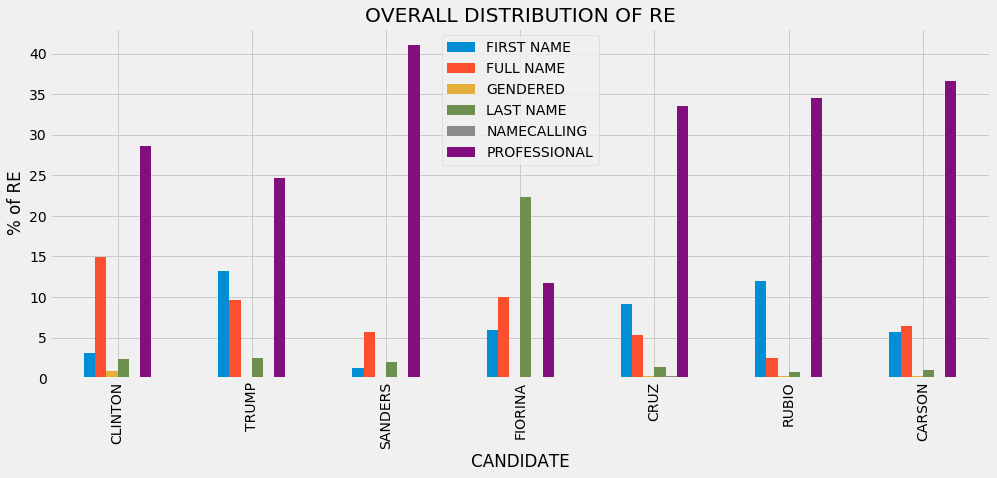

In [198]:
plt.style.use('fivethirtyeight')
distribution.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('OVERALL DISTRIBUTION OF RE')
plt.show()
#Why are there two?

### Some Conclusions
**The person who is referred to by their full name the most often is Hillary Clinton. The person who is referred to by their first name the most often is Donald Trump. The person who is referred to by a professional title the most often is Bernie Sanders. Every candidate is referred to by a professional title more ofthen than any other type of RE except for Carly Fiorina, who is mostly referred to by her last name. Hillary Clinton is referred to by a professional title more often than Donald Trump, but less often than Bernie Sanders, Ted Cruz, and Marco Rubio.**

### Some Questions
**What does it mean to call someone by their professional title vs their first name? What does the choice of using a first name/full name instead of a title mean? Is the distribution in type of RE for each candidate different depending on who is referring to/addressing them? Is this distribution different when a candidate is being referred to as opposed to addressed?**

**Let's look at some individual speakers now.**

### Donald Trump

In [56]:
trump_re = get_RE_for_label(trump['Tree'], 'all')
trump_re_freq = {re: trump_re.count(re) for re in trump_re}
trump_re_freq

{'Trump': 15, 'Cruz': 1, 'Ted': 29, 'Neil': 4, 'Nikki': 4, 'Jeb': 34, 'Barack Obama': 12, 'Donald': 2, 'President Obama': 26, 'Carl': 4, 'Marco': 16, 'Maria': 2, 'Ivanka': 3, 'Eric': 2, 'Don': 2, 'Hillary': 42, 'Hillary Clinton': 33, 'Chris': 18, 'Obama': 15, 'Putin': 26, 'Podesta': 1, 'Bernie Sanders': 10, 'John Podesta': 1, 'Assad': 21, 'Ronald Reagan': 11, 'John': 3, 'Ben': 8, 'Bill Clinton': 2, 'President Clinton': 1, 'Michelle Obama': 2, 'Deborah Wasserman Schultz': 2, 'Anderson': 3, 'Captain Khan': 1, 'Abraham Lincoln': 3, 'Honest Abe': 2, 'Warren': 1, 'Donald Trump': 9, 'Clinton': 2, 'Gadhafi': 4, 'Kerry': 2, 'Scalia': 1, 'Dwight Eisenhower': 3, 'Mr. Trump': 6, 'Wolf': 2, 'Lindsey Graham': 2, 'Jeb Bush': 4, 'Governor Bush': 1, 'Mister': 1, 'Santorum': 1, 'Governor Huckabee': 1, 'Mitch McConnell': 1, 'Bush': 3, 'George Bush': 4, 'Chris Christie': 3, 'Ben Carson': 7, 'Ted Cruz': 3, 'Sheriff Joe Arpaio': 3, 'Mitt Romney': 5, 'Robin Hood': 2, 'Anderson Cooper': 2, 'Bill': 2, 'Saddam

**Interesting. It looks like Trump refers to himself as Mr. Trump 6 times. Let's see those instances in context.**

In [57]:
trump_mrtrump_trees = get_trees_for(trump, 'Donald Trump', 'Mr. Trump')

In [58]:
trump_mrtrump_trees

,Date,Debate Type,Speaker,Sents,Tree
1917,11-10-15,primary_rep,TRUMP,"He said, ""You know, Mr. Trump?","[(He, PRP), (said, VBD), (,, ,), (``, ``), (Yo..."
2150,12-15-15,primary_rep,TRUMP,I think it's very sad that CNN leads Jeb Bush...,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),..."
2152,12-15-15,primary_rep,TRUMP,"And, frankly, I watched the first debate, and ...","[(And, CC), (,, ,), (frankly, RB), (,, ,), (I,..."
2153,12-15-15,primary_rep,TRUMP,"Mr. Trump"" — these poor guys — although, I mus...","[[(Mr., NNP), (Trump, NNP)], ('', ''), (—, IN)..."
3247,2-25-16,primary_rep,TRUMP,"Mr. Trump, you're doing a great job.","[[(Mr., NNP), (Trump, NNP)], (,, ,), (you, PRP..."


In [59]:
trump_mrtrump_trees.loc[2152]['Sents']

'And, frankly, I watched the first debate, and the first long number of questions were, "Mr. Trump said this, Mr. Trump said that.'

In [60]:
trump_mrtrump_trees.loc[2153]['Sents']

'Mr. Trump" — these poor guys — although, I must tell you, Santorum, good guy.'

**It looks like every time Donald Trump refers to himself as Mr. Trump, he is quoting someone else.**

In [61]:
trump_clinton_tree = get_trees_for(trump, 'Hillary Clinton')
trump_clinton_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
331,10-19-16,general,TRUMP,"But Hillary was extremely upset, extremely angry.","[(But, CC), [(Hillary, NNP)], (was, VBD), (ext..."
337,10-19-16,general,TRUMP,And I am—I don't know if Hillary was saying it...,"[(And, CC), (I, PRP), (am—I, VBP), (do, VBP), ..."
349,10-19-16,general,TRUMP,"If you go with what Hillary is saying, in the ...","[(If, IN), (you, PRP), (go, VBP), (with, IN), ..."
350,10-19-16,general,TRUMP,"Now, you can say that that's OK and Hillary ca...","[(Now, RB), (,, ,), (you, PRP), (can, MD), (sa..."
362,10-19-16,general,TRUMP,Hillary wants to give amnesty.,"[[(Hillary, JJ)], (wants, VBZ), (to, TO), (giv..."


In [62]:
trump_REclinton = get_RE_for_label(trump['Tree'], 'Hillary Clinton')
trump_REclinton

['Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'President Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hil

In [63]:
trump_clinton_freq = {re: trump_REclinton.count(re) for re in trump_REclinton}
trump_clinton_freq

{'Hillary': 42, 'Hillary Clinton': 33, 'President Clinton': 1, 'Clinton': 2, 'Secretary Clinton': 21}

In [64]:
trump_clinton_REtype_freq = get_re_type_freq(clinton_re_maps, trump_clinton_freq)
trump_clinton_REtype_freq

{'PROFESSIONAL': 21, 'FULL NAME': 33, 'FIRST NAME': 42, 'LAST NAME': 2}

##### Carly Fiorina

In [65]:
trump_REfiorina = get_RE_for_label(trump['Tree'], 'Carly Fiorina')
trump_fiorina_freq = {re: trump_REfiorina.count(re) for re in trump_REfiorina}
trump_fiorina_freq

{'Carly': 5}

In [66]:
trump_fiorina_REtype_freq = get_re_type_freq(fiorina_re_maps, trump_fiorina_freq)
trump_fiorina_REtype_freq

{'FIRST NAME': 5}

##### Ted Cruz

In [67]:
trump_REcruz = get_RE_for_label(trump['Tree'], 'Ted Cruz')
trump_cruz_freq = {re: trump_REcruz.count(re) for re in trump_REcruz}
trump_cruz_freq

{'Cruz': 1, 'Ted': 29, 'Ted Cruz': 3, 'Lyin': 2}

In [68]:
trump_cruz_REtype_freq = get_re_type_freq(cruz_re_maps, trump_cruz_freq)
trump_cruz_REtype_freq

{'FULL NAME': 3, 'FIRST NAME': 29, 'LAST NAME': 1, 'NAMECALLING': 2}

##### Marco Rubio

In [69]:
trump_RErubio = get_RE_for_label(trump['Tree'], 'Marco Rubio')
trump_rubio_freq = {re: trump_RErubio.count(re) for re in trump_RErubio}
trump_rubio_freq

{'Marco': 16, 'Senator Rubio': 1, 'Senator Marco Rubio': 1}

In [70]:
trump_rubio_REtype_freq = get_re_type_freq(rubio_re_maps, trump_rubio_freq)
trump_rubio_REtype_freq

{'PROFESSIONAL': 2, 'FIRST NAME': 16}

##### Bernie Sanders

In [71]:
trump_REsanders = get_RE_for_label(trump['Tree'], 'Bernie Sanders')
trump_sanders_freq = {re: trump_REsanders.count(re) for re in trump_REsanders}
trump_sanders_freq

{'Bernie Sanders': 10}

In [72]:
trump_sanders_REtype_freq = get_re_type_freq(sanders_re_maps, trump_sanders_freq)
trump_sanders_REtype_freq

{'FULL NAME': 10}

##### Ben Carson

In [199]:
trump_REcarson = get_RE_for_label(trump['Tree'], 'Ben Carson')
trump_carson_freq = {re: trump_REcarson.count(re) for re in trump_REcarson}
trump_carson_freq

{'Ben': 8, 'Ben Carson': 7, 'Dr. Ben Carson': 1}

In [200]:
trump_carson_REtype_freq = get_re_type_freq(carson_re_maps, trump_carson_freq)
trump_carson_REtype_freq

{'FULL NAME': 7, 'FIRST NAME': 8, 'PROFESSIONAL': 1}

In [201]:
distribution_trump = pd.DataFrame([trump_clinton_REtype_freq, trump_sanders_REtype_freq, trump_fiorina_REtype_freq, trump_cruz_REtype_freq, trump_rubio_REtype_freq, trump_carson_REtype_freq], index = ['CLINTON', 'SANDERS', 'FIORINA', 'CRUZ', 'RUBIO', 'CARSON'])
distribution_trump.fillna(0, inplace=True)

distribution_trump['TOTAL']=distribution_trump.sum(axis=1)

#Get the percentage of each type of RE for each candidate.
distribution_trump['FIRST NAME'] = distribution_trump['FIRST NAME']/distribution_trump['TOTAL']*100
distribution_trump['FULL NAME'] = distribution_trump['FULL NAME']/distribution_trump['TOTAL']*100
distribution_trump['LAST NAME'] = distribution_trump['LAST NAME']/distribution_trump['TOTAL']*100
distribution_trump['NAMECALLING'] = distribution_trump['NAMECALLING']/distribution_trump['TOTAL']*100
distribution_trump['PROFESSIONAL'] = distribution_trump['PROFESSIONAL']/distribution_trump['TOTAL']*100
del distribution_trump['TOTAL']
distribution_trump.head(7)

,FIRST NAME,FULL NAME,LAST NAME,NAMECALLING,PROFESSIONAL
CLINTON,42.857143,33.673469,2.040816,0.000000,21.428571
SANDERS,0.000000,100.000000,0.000000,0.000000,0.000000
FIORINA,100.000000,0.000000,0.000000,0.000000,0.000000
CRUZ,82.857143,8.571429,2.857143,5.714286,0.000000
RUBIO,88.888889,0.000000,0.000000,0.000000,11.111111
CARSON,50.000000,43.750000,0.000000,0.000000,6.250000


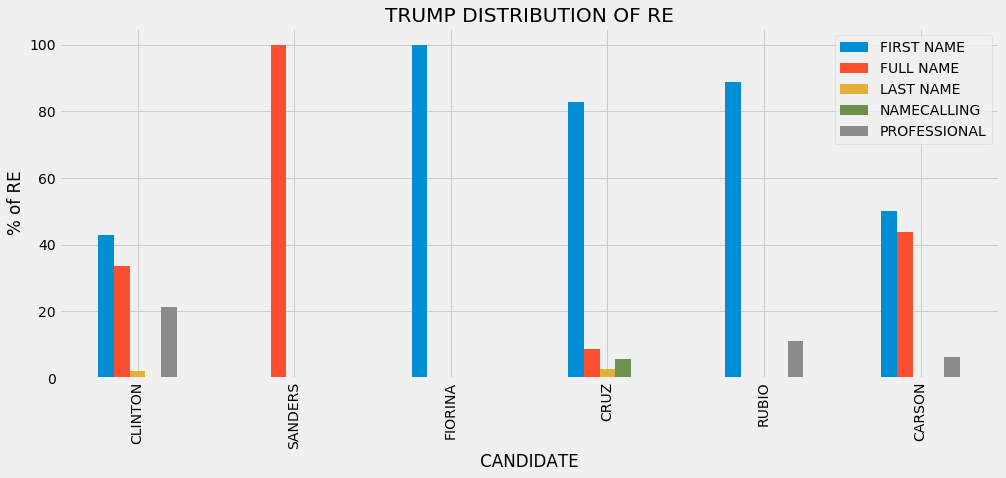

In [202]:
plt.style.use('fivethirtyeight')
distribution_trump.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('TRUMP DISTRIBUTION OF RE')
plt.show()
#Why are there two?

### Some Conclusions
**We can see Trump's most frequent type of RE for all of the candidates were looking at besides Bernie Sanders is their first name. Trump refers to Hillary Clinton by her first name or her full name more often than by a professional title, but calls her by a professional title more often than he calls any of the other candidates by one. In fact, the only other person he uses a professional title for is Marco Rubio. Trump refers to the only other female candidate, Carly Fiorina, exclusively by her first name. He also calls Ted Cruz names more often than he refers to him as Cruz.**

**Let's check out how Hillary Clinton refers to these candidates.**

### Hillary Clinton

In [75]:
clinton_re = get_RE_for_label(clinton['Tree'], 'all')
clinton_re_freq = {re: clinton_re.count(re) for re in clinton_re}
clinton_re_freq

{'Senator Sanders': 111, 'Lester': 8, 'Andrea': 1, 'Harry Truman': 2, 'President Obama': 91, "Governor O'Malley": 10, 'Lindsey Graham': 1, 'Secretary Kerry': 5, 'Assad': 22, 'Putin': 15, 'Hillary Clinton': 2, 'Chris': 14, 'George W.': 1, 'Bush': 12, 'Chris Cuomo': 1, 'Chairman': 1, 'Ronald Reagan': 3, 'Bill': 5, 'Abraham Lincoln': 2, 'Abraham': 1, 'Lincoln': 2, 'Anderson': 6, 'Senator Obama': 6, 'Osama': 2, 'Laden': 8, 'Gadhafi': 10, 'Senator Webb': 1, 'Bernie': 2, 'Clinton': 2, 'Barack Obama': 7, 'Donald': 80, 'George W. Bush': 10, 'Donald Trump': 23, 'Vladimir Putin': 2, 'Bernie Sanders': 3, 'Alicia Machado': 2, 'Mr.': 2, 'John McCain': 1, 'President Reagan': 3, 'Michelle Obama': 2, 'Captain Khan': 2, 'Martha': 7, 'George Washington': 1, 'President Lincoln': 2, 'Mr. Carter': 1, 'Trump': 4, 'John': 6, 'Gaddafi': 2, 'Eric Garner': 1, 'Tamir Rice': 1, 'Michael Brown': 1, 'Trayvon Martin': 2, 'Bin Laden': 2, 'Hillary': 1, 'Martin': 2, 'Mr. Trump': 1, 'David': 3, 'Senator': 11, 'Mubarak':

In [204]:
clinton_ents = get_entities(clinton['Entities'])
clinton_ents

{'Anderson Cooper', 'Chuck Todd', 'Nikki Haley', 'Humayun Khan', 'John Kasich', 'Alicia Machado', 'TITLE', 'David Muir', 'Donald Trump', 'Wolf Blitzer', "Martin O'Malley", 'Lindsey Graham', 'Sandra Bland', 'Harry Truman', 'Bashar al-Assad', 'David Duke', 'Jorge Ramos', 'Trayvon Martin', 'Don Lemon', 'Lester Holt', 'Nelson Mandela', 'Andrea Mitchell', 'Rachel Maddow', 'Benjamin Netanyahu', 'Bill Clinton', 'Yasser Arafat', 'Hillary Clinton', 'George W. Bush', 'Lincoln Chafee', 'Scott Walker', 'James Carter', 'George Washington', 'Ashraf Ghani', 'John McCain', 'Ronald Reagan', 'Osama bin Laden', 'Jim Webb', 'Elizabeth Warren', 'Michael Brown', 'Muammar Gaddafi', 'Jeb Bush', 'Joe Biden', 'Barack Obama', 'Martha Raddatz', 'Abraham Lincoln', 'John Kerry', 'Eric Garner', 'Dana Bash', 'Bernie Sanders', 'Hosni Mubarak', 'Al Gore', 'Chris Christie', 'Saddam Hussein', 'Tamir Rice', 'Vladimir Putin', 'Michelle Obama', 'Chris Cuomo'}

In [77]:
'Carly Fiorina' in clinton_ents

False

In [78]:
'Ted Cruz' in clinton_ents

False

In [79]:
'Marco Rubio' in clinton_ents

False

**Hillary Clinton doesn't refer to any of the Republican candidates listed above except for Donald Trump. Therefore, we're going to look at the way she refers to the other candidates she was in debates with, and we are going to examine the titles she uses.**

In [80]:
get_trees_for(clinton, 'TITLE')

,Date,Debate Type,Speaker,Sents,Tree
491,1-25-16,primary_dem,CLINTON,"And, at the end of it, the Chairman said, ""No,...","[(And, CC), (,, ,), (at, IN), (the, DT), (end,..."
1178,10-19-16,general,CLINTON,"He went after Mr. and Mrs. Khan, the parents ...","[(He, PRP), (went, VBD), (after, IN), [(Mr., N..."
1400,10-9-16,general,CLINTON,"He never apologized to Mr. and Mrs. Khan, the ...","[(He, PRP), (never, RB), (apologized, VBD), (t..."
2173,12-19-15,primary_dem,CLINTON,"And, you know, with all due respect, Senator, ...","[(And, CC), (,, ,), (you, PRP), (know, VBP), (..."
2310,12-19-15,primary_dem,CLINTON,"Senator, I have been -- I have been fighting ...","[[(Senator, NNP)], (,, ,), (I, PRP), (have, VB..."
2409,2-11-16,primary_dem,CLINTON,"Last week in a CNN town hall, the Senator told...","[(Last, JJ), (week, NN), (in, IN), (a, DT), [(..."
2559,2-11-16,primary_dem,CLINTON,I've said I'm looking at a couple of different...,"[(I, PRP), ('ve, VBP), (said, VBD), (I, PRP), ..."
2569,2-11-16,primary_dem,CLINTON,"Well, Senator, look, I think we're in vigorou...","[(Well, RB), (,, ,), [(Senator, NNP)], (,, ,),..."
2598,2-11-16,primary_dem,CLINTON,"But, the real issue, I think, that the Senator...","[(But, CC), (,, ,), (the, DT), (real, JJ), (is..."
2745,2-11-16,primary_dem,CLINTON,"You know, Senator, what I am concerned about,...","[(You, PRP), (know, VBP), (,, ,), [(Senator, N..."


**We see that Hillary Clinton often refers to one of the other candidates as Senator. Since all of these instances were in the primary debates, and it's clear that she is talking directly to someone instead of about them, it is clear that she much be talking about Senator Bernie Sanders or Senator Jim Webb. Based on the dates of the debates, she is always talking about Bernie Sanders, because Jim Webb withdrew from the race on October 20, 2015.**

In [81]:
clinton_trump_tree = get_trees_for(clinton, 'Donald Trump')
clinton_trump_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
955,10-19-16,general,CLINTON,"And, you know, look, I understand that Donald'...","[(And, CC), (,, ,), (you, PRP), (know, VBP), (..."
964,10-19-16,general,CLINTON,Donald has said he's in favor of defunding Pla...,"[[(Donald, NNP)], (has, VBZ), (said, VBD), (he..."
991,10-19-16,general,CLINTON,I don't want to see the deportation force that...,"[(I, PRP), (do, VBP), (n't, RB), (want, VB), (..."
1005,10-19-16,general,CLINTON,When it comes to the wall that Donald talks ab...,"[(When, WRB), (it, PRP), (comes, VBZ), (to, TO..."
1013,10-19-16,general,CLINTON,"But it is clear, when you look at what Donald ...","[(But, CC), (it, PRP), (is, VBZ), (clear, JJ),..."


In [82]:
clinton_REtrump = get_RE_for_label(clinton['Tree'], 'Donald Trump')
clinton_REtrump

['Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Mr. Trump', 'Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Trump', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald

In [83]:
clinton_trump_freq = {re: clinton_REtrump.count(re) for re in clinton_REtrump}
clinton_trump_freq

{'Donald': 80, 'Donald Trump': 23, 'Trump': 4, 'Mr. Trump': 1}

In [84]:
clinton_trump_REtype_freq = get_re_type_freq(trump_re_maps, clinton_trump_freq)
clinton_trump_REtype_freq

{'PROFESSIONAL': 1, 'FULL NAME': 23, 'FIRST NAME': 80, 'LAST NAME': 4}

##### Bernie Sanders

In [85]:
clinton_REsanders = get_RE_for_label(clinton['Tree'], 'Bernie Sanders')
clinton_senator = get_RE_for_label(clinton['Tree'], 'TITLE')
clinton_senator = [x for x in clinton_senator if x == 'Senator']
clinton_REsanders = clinton_REsanders + clinton_senator
set(clinton_REsanders)

{'Bernie Sanders', 'Senator', 'Bernie', 'Senator Sanders'}

In [86]:
clinton_sanders_freq = {re: clinton_REsanders.count(re) for re in clinton_REsanders}
clinton_sanders_freq

{'Senator Sanders': 111, 'Bernie': 2, 'Bernie Sanders': 3, 'Senator': 11}

In [87]:
sanders_re_maps['Senator'] = 'PROFESSIONAL'
clinton_sanders_REtype_freq = get_re_type_freq(sanders_re_maps, clinton_sanders_freq)
clinton_sanders_REtype_freq

{'FIRST NAME': 2, 'FULL NAME': 3, 'PROFESSIONAL': 122}

##### Martin O'Malley

In [88]:
clinton_REomalley = get_RE_for_label(clinton['Tree'], "Martin O'Malley")
set(clinton_REomalley)

{"Governor O'Malley", 'Martin'}

In [89]:
clinton_omalley_freq = {re: clinton_REomalley.count(re) for re in clinton_REomalley}
clinton_omalley_freq

{"Governor O'Malley": 10, 'Martin': 2}

In [90]:
omalley_re_maps = {"Governor O'Malley" : "PROFESSIONAL", "Martin": "FIRST NAME"}
clinton_omalley_REtype_freq = get_re_type_freq(omalley_re_maps, clinton_omalley_freq)
clinton_omalley_REtype_freq

{'PROFESSIONAL': 10, 'FIRST NAME': 2}

In [91]:
distribution_clinton = pd.DataFrame([clinton_omalley_REtype_freq, clinton_sanders_REtype_freq, clinton_trump_REtype_freq, ], index = ["O'MALLEY", 'SANDERS', 'TRUMP'])
distribution_clinton.fillna(0, inplace=True)

distribution_clinton['TOTAL']=distribution_clinton.sum(axis=1)

#Get the percentage of each type of RE for each candidate.
distribution_clinton['FIRST NAME'] = distribution_clinton['FIRST NAME']/distribution_clinton['TOTAL']*100
distribution_clinton['FULL NAME'] = distribution_clinton['FULL NAME']/distribution_clinton['TOTAL']*100
distribution_clinton['LAST NAME'] = distribution_clinton['LAST NAME']/distribution_clinton['TOTAL']*100
distribution_clinton['PROFESSIONAL'] = distribution_clinton['PROFESSIONAL']/distribution_clinton['TOTAL']*100
del distribution_clinton['TOTAL']
distribution_clinton.head(6)

,FIRST NAME,FULL NAME,LAST NAME,PROFESSIONAL
O'MALLEY,16.666667,0.000000,0.000000,83.333333
SANDERS,1.574803,2.362205,0.000000,96.062992
TRUMP,74.074074,21.296296,3.703704,0.925926


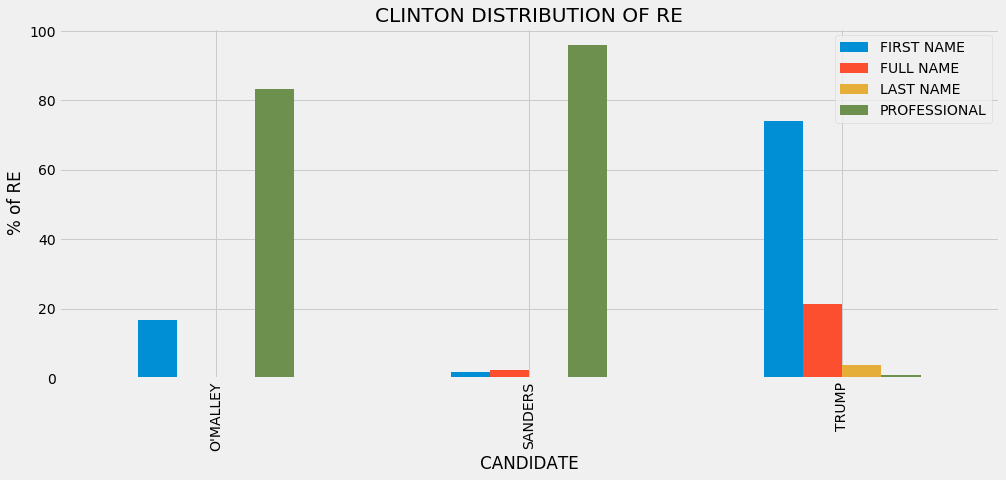

In [92]:
distribution_clinton.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('CLINTON DISTRIBUTION OF RE')
plt.show()

### Some Conclusions
**It's a little harder to compare this graph to Trump's since Clinton didn't refer to all of the same candidates Trump did, but we can see that she refers to O'Malley and Sanders by a professional title the majority of the time, yet she almost never calls Trump by a professional title, and really mostly refers to him by his first name.**

**Last steps: Let's look at how Carly Fiorina refers to other candidates, and then how Bernie Sanders, Ted Cruz, and Marco Rubio refer to other candidates**

### Carly Fiorina

##### Donald Trump

In [93]:
fiorina_REtrump = get_RE_for_label(fiorina['Tree'], "Donald Trump")
set(fiorina_REtrump)

{'Mr. Trump'}

In [94]:
fiorina_trump_freq = {re: fiorina_REtrump.count(re) for re in fiorina_REtrump}
fiorina_trump_freq

{'Mr. Trump': 12}

In [95]:
fiorina_trump_REtype_freq = get_re_type_freq(trump_re_maps, fiorina_trump_freq)
fiorina_trump_REtype_freq

{'PROFESSIONAL': 12}

##### Hillary Clinton

In [96]:
fiorina_REclinton = get_RE_for_label(fiorina['Tree'], "Hillary Clinton")
set(fiorina_REclinton)

{'Mrs. Clinton', 'Clinton', 'Hillary Clinton'}

In [97]:
fiorina_clinton_freq = {re: fiorina_REclinton.count(re) for re in fiorina_REclinton}
fiorina_clinton_freq

{'Mrs. Clinton': 7, 'Hillary Clinton': 14, 'Clinton': 3}

In [98]:
fiorina_clinton_REtype_freq = get_re_type_freq(clinton_re_maps, fiorina_clinton_freq)
fiorina_clinton_REtype_freq

{'FULL NAME': 14, 'LAST NAME': 3, 'GENDERED': 7}

##### Ted Cruz

In [99]:
fiorina_REcruz = get_RE_for_label(fiorina['Tree'], "Ted Cruz")
set(fiorina_REcruz)

{'Senator Cruz'}

In [100]:
fiorina_cruz_freq = {re: fiorina_REcruz.count(re) for re in fiorina_REcruz}
fiorina_cruz_freq

{'Senator Cruz': 1}

In [101]:
fiorina_cruz_REtype_freq = get_re_type_freq(cruz_re_maps, fiorina_cruz_freq)
fiorina_cruz_REtype_freq

{'PROFESSIONAL': 1}

##### Marco Rubio

In [102]:
fiorina_RErubio = get_RE_for_label(fiorina['Tree'], "Marco Rubio")
set(fiorina_RErubio)

{'Senator Rubio'}

In [103]:
fiorina_rubio_freq = {re: fiorina_RErubio.count(re) for re in fiorina_RErubio}
fiorina_rubio_freq

{'Senator Rubio': 2}

In [104]:
fiorina_rubio_REtype_freq = get_re_type_freq(rubio_re_maps, fiorina_rubio_freq)
fiorina_rubio_REtype_freq

{'PROFESSIONAL': 2}

##### Bernie Sanders

In [105]:
#Fiorina does not refer to Sanders at all
fiorina_RErubio = get_RE_for_label(fiorina['Tree'], "Bernie Sanders")
set(fiorina_RErubio)

set()

##### Ben Carson

In [205]:
fiorina_REcarson = get_RE_for_label(fiorina['Tree'], "Ben Carson")
fiorina_carson_freq = {re: fiorina_REcarson.count(re) for re in fiorina_REcarson}
fiorina_carson_freq

{}

In [106]:
distribution_fiorina = pd.DataFrame([fiorina_clinton_REtype_freq, fiorina_trump_REtype_freq, fiorina_rubio_REtype_freq, fiorina_cruz_REtype_freq], index = ["CLINTON", 'TRUMP', 'RUBIO', 'CRUZ'])
distribution_fiorina.fillna(0, inplace=True)

distribution_fiorina['TOTAL']=distribution_fiorina.sum(axis=1)

#Get the percentage of each type of RE for each candidate.
distribution_fiorina['FULL NAME'] = distribution_fiorina['FULL NAME']/distribution_fiorina['TOTAL']*100
distribution_fiorina['LAST NAME'] = distribution_fiorina['LAST NAME']/distribution_fiorina['TOTAL']*100
distribution_fiorina['GENDERED'] = distribution_fiorina['GENDERED']/distribution_fiorina['TOTAL']*100
distribution_fiorina['PROFESSIONAL'] = distribution_fiorina['PROFESSIONAL']/distribution_fiorina['TOTAL']*100
del distribution_fiorina['TOTAL']
distribution_fiorina.head(6)

,FULL NAME,GENDERED,LAST NAME,PROFESSIONAL
CLINTON,58.333333,29.166667,12.5,0.0
TRUMP,0.000000,0.000000,0.0,100.0
RUBIO,0.000000,0.000000,0.0,100.0
CRUZ,0.000000,0.000000,0.0,100.0


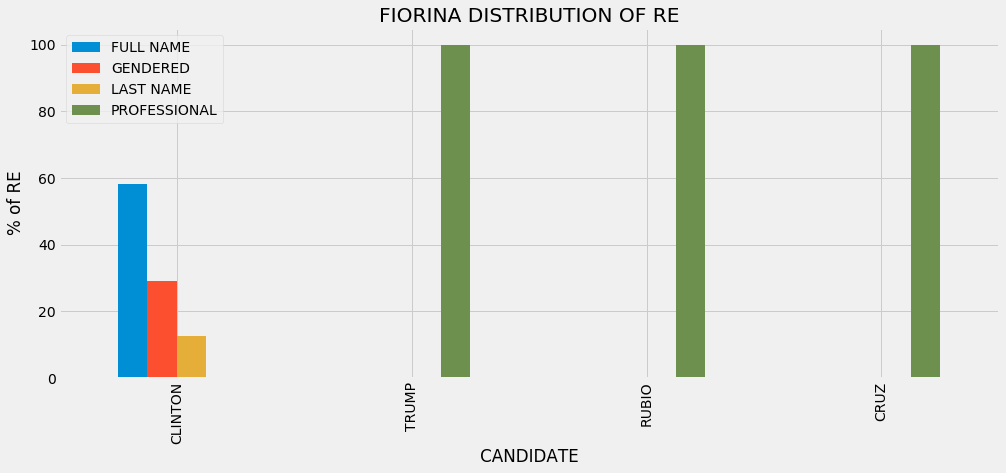

In [107]:
distribution_fiorina.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('FIORINA DISTRIBUTION OF RE')
plt.show()

### Some Conclusions
**While Fiorina referred to Rubio and Cruz as Senator, she never referred to Clinton as Secretary, always Mrs., her full name, or her last name. Fiorina always referred to Trump as Mr. Trump, which is interesting because he only ever referred to her by her first name. Fiorina referred to Clinton 24 times, which is interesting because Clinton did not refer to Fiorina at all. It is also important to notice that Fiorina only referred to Marco Rubio two times, and Ted Cruz one time**

Ideas: Do people overuse address terms? relative frequency, words per utterance, length of sentences, look for spikes in frequency, when do they use you? more confrontational
frequncy of you per utterance, freq of RE per utterance, graph freq for each utterance and compare


### Ted Cruz

##### Donald Trump

In [109]:
cruz_REtrump = get_RE_for_label(cruz['Tree'], "Donald Trump")
set(cruz_REtrump)

{'Donald J. Trump', 'Mr. Trump', 'Donald Trump', 'Donald'}

In [110]:
cruz_trump_freq = {re: cruz_REtrump.count(re) for re in cruz_REtrump}
cruz_trump_freq

{'Donald': 115, 'Donald J. Trump': 1, 'Donald Trump': 27, 'Mr. Trump': 2}

In [113]:
cruz_trump_REtype_freq = get_re_type_freq(trump_re_maps, cruz_trump_freq)
cruz_trump_REtype_freq

{'PROFESSIONAL': 2, 'FULL NAME': 28, 'FIRST NAME': 115}

##### Hillary Clinton

In [114]:
cruz_REclinton = get_RE_for_label(cruz['Tree'], "Hillary Clinton")
set(cruz_REclinton)

{'Hillary', 'Madam Secretary', 'Clinton', 'Hillary Clinton'}

In [116]:
cruz_clinton_freq = {re: cruz_REclinton.count(re) for re in cruz_REclinton}
cruz_clinton_freq

{'Hillary Clinton': 53, 'Hillary': 10, 'Clinton': 5, 'Madam Secretary': 1}

In [117]:
cruz_clinton_REtype_freq = get_re_type_freq(clinton_re_maps, cruz_clinton_freq)
cruz_clinton_REtype_freq

{'FULL NAME': 53, 'FIRST NAME': 10, 'LAST NAME': 5, 'GENDERED': 1}

##### Carly Fiorina

In [118]:
cruz_REfiorina = get_RE_for_label(cruz['Tree'], "Carly Fiorina")
set(cruz_REfiorina)

{'Carly Fiorina'}

In [120]:
cruz_fiorina_freq = {re: cruz_REfiorina.count(re) for re in cruz_REfiorina}
cruz_fiorina_freq

{'Carly Fiorina': 1}

In [127]:
get_trees_for(cruz, 'Carly Fiorina')

,Date,Debate Type,Speaker,Sents,Tree
1699,3-10-16,primary_rep,CRUZ,It's why Carly Fiorina endorsed me yesterday.,"[(It, PRP), ('s, VBZ), (why, WRB), [(Carly, NN..."


In [121]:
cruz_fiorina_REtype_freq = get_re_type_freq(fiorina_re_maps, cruz_fiorina_freq)
cruz_fiorina_REtype_freq

{'FULL NAME': 1}

##### Marco Rubio

In [128]:
cruz_RErubio = get_RE_for_label(cruz['Tree'], "Marco Rubio")
set(cruz_RErubio)

{'Senator Rubio', 'Marco', 'Marco Rubio'}

In [129]:
cruz_rubio_freq = {re: cruz_RErubio.count(re) for re in cruz_RErubio}
cruz_rubio_freq

{'Marco Rubio': 2, 'Marco': 32, 'Senator Rubio': 6}

In [130]:
cruz_rubio_REtype_freq = get_re_type_freq(rubio_re_maps, cruz_rubio_freq)
cruz_rubio_REtype_freq

{'FULL NAME': 2, 'PROFESSIONAL': 6, 'FIRST NAME': 32}

##### Bernie Sanders

In [131]:
cruz_REsanders = get_RE_for_label(cruz['Tree'], "Bernie Sanders")
set(cruz_REsanders)

{'Bernie Sanders'}

In [132]:
cruz_sanders_freq = {re: cruz_REsanders.count(re) for re in cruz_REsanders}
cruz_sanders_freq

{'Bernie Sanders': 3}

In [133]:
cruz_sanders_REtype_freq = get_re_type_freq(sanders_re_maps, cruz_sanders_freq)
cruz_sanders_REtype_freq

{'FULL NAME': 3}

##### Ben Carson

In [206]:
cruz_REcarson = get_RE_for_label(cruz['Tree'], "Ben Carson")
set(cruz_REcarson)

{'Ben', 'Ben Carson'}

In [207]:
cruz_carson_freq = {re: cruz_REcarson.count(re) for re in cruz_REcarson}
cruz_carson_freq

{'Ben': 9, 'Ben Carson': 2}

In [208]:
cruz_carson_REtype_freq = get_re_type_freq(carson_re_maps, cruz_carson_freq)
cruz_carson_REtype_freq

{'FULL NAME': 2, 'FIRST NAME': 9}

In [209]:
distribution_cruz = pd.DataFrame([cruz_clinton_REtype_freq, cruz_trump_REtype_freq, cruz_rubio_REtype_freq, cruz_fiorina_REtype_freq, cruz_sanders_REtype_freq, cruz_carson_REtype_freq], index = ["CLINTON", 'TRUMP', 'RUBIO', 'FIORINA', 'SANDERS', 'CARSON'])
distribution_cruz.fillna(0, inplace=True)

distribution_cruz['TOTAL']=distribution_cruz.sum(axis=1)

#Get the percentage of each type of RE for each candidate.
distribution_cruz['FIRST NAME'] = distribution_cruz['FIRST NAME']/distribution_cruz['TOTAL']*100
distribution_cruz['FULL NAME'] = distribution_cruz['FULL NAME']/distribution_cruz['TOTAL']*100
distribution_cruz['LAST NAME'] = distribution_cruz['LAST NAME']/distribution_cruz['TOTAL']*100
distribution_cruz['GENDERED'] = distribution_cruz['GENDERED']/distribution_cruz['TOTAL']*100
distribution_cruz['PROFESSIONAL'] = distribution_cruz['PROFESSIONAL']/distribution_cruz['TOTAL']*100
del distribution_cruz['TOTAL']
distribution_cruz.head(6)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,PROFESSIONAL
CLINTON,14.492754,76.811594,1.449275,7.246377,0.00000
TRUMP,79.310345,19.310345,0.000000,0.000000,1.37931
RUBIO,80.000000,5.000000,0.000000,0.000000,15.00000
FIORINA,0.000000,100.000000,0.000000,0.000000,0.00000
SANDERS,0.000000,100.000000,0.000000,0.000000,0.00000
CARSON,81.818182,18.181818,0.000000,0.000000,0.00000


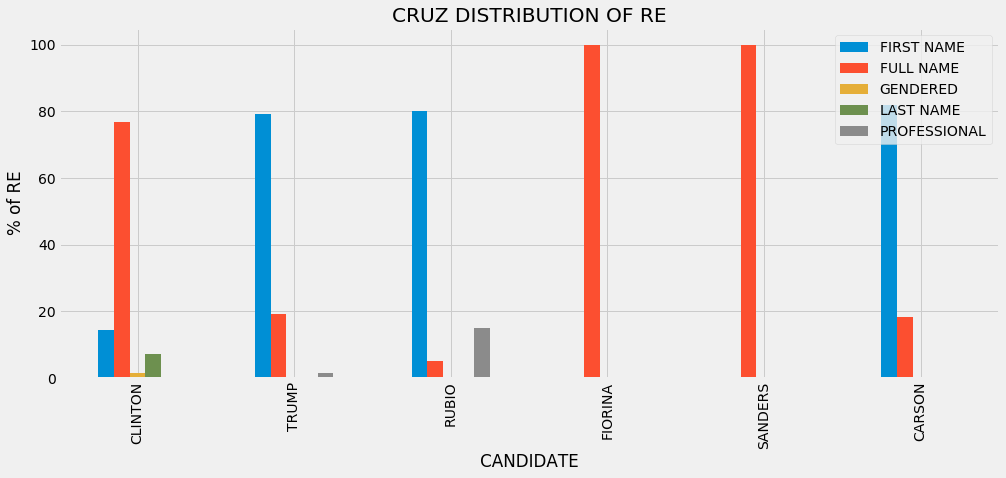

In [210]:
distribution_cruz.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('CRUZ DISTRIBUTION OF RE')
plt.show()

### Marco Rubio

##### Donald Trump

In [141]:
rubio_REtrump = get_RE_for_label(rubio['Tree'], "Donald Trump")
set(rubio_REtrump)

{'Trump', 'Donald Trump', 'Mr. Trump', 'Donald'}

In [142]:
rubio_trump_freq = {re: rubio_REtrump.count(re) for re in rubio_REtrump}
rubio_trump_freq

{'Donald': 26, 'Donald Trump': 11, 'Trump': 3, 'Mr. Trump': 4}

In [143]:
rubio_trump_REtype_freq = get_re_type_freq(trump_re_maps, rubio_trump_freq)
rubio_trump_REtype_freq

{'PROFESSIONAL': 4, 'FULL NAME': 11, 'FIRST NAME': 26, 'LAST NAME': 3}

##### Hillary Clinton

In [145]:
rubio_REclinton = get_RE_for_label(rubio['Tree'], "Hillary Clinton")
set(rubio_REclinton)

{'Hillary', 'Hillary Clinton'}

In [146]:
rubio_clinton_freq = {re: rubio_REclinton.count(re) for re in rubio_REclinton}
rubio_clinton_freq

{'Hillary Clinton': 37, 'Hillary': 2}

In [147]:
rubio_clinton_REtype_freq = get_re_type_freq(clinton_re_maps, rubio_clinton_freq)
rubio_clinton_REtype_freq

{'FULL NAME': 37, 'FIRST NAME': 2}

##### Ted Cruz

In [149]:
rubio_REcruz = get_RE_for_label(rubio['Tree'], "Ted Cruz")
set(rubio_REcruz)

{'Ted Cruz', 'Ted', 'Senator Cruz'}

In [150]:
rubio_cruz_freq = {re: rubio_REcruz.count(re) for re in rubio_REcruz}
rubio_cruz_freq

{'Ted': 13, 'Ted Cruz': 8, 'Senator Cruz': 8}

In [151]:
rubio_cruz_REtype_freq = get_re_type_freq(cruz_re_maps, rubio_cruz_freq)
rubio_cruz_REtype_freq

{'FULL NAME': 8, 'PROFESSIONAL': 8, 'FIRST NAME': 13}

##### Bernie Sanders

In [154]:
rubio_REsanders = get_RE_for_label(rubio['Tree'], "Bernie Sanders")
set(rubio_REsanders)

{'Bernie Sanders'}

In [155]:
rubio_sanders_freq = {re: rubio_REsanders.count(re) for re in rubio_REsanders}
rubio_sanders_freq

{'Bernie Sanders': 8}

In [156]:
rubio_sanders_REtype_freq = get_re_type_freq(sanders_re_maps, rubio_sanders_freq)
rubio_sanders_REtype_freq

{'FULL NAME': 8}

##### Ben Carson

In [211]:
rubio_REcarson = get_RE_for_label(rubio['Tree'], "Ben Carson")
set(rubio_REcarson)

{'Ben Carson', 'Dr. Carson'}

In [212]:
rubio_carson_freq = {re: rubio_REcarson.count(re) for re in rubio_REcarson}
rubio_carson_freq

{'Dr. Carson': 1, 'Ben Carson': 1}

In [213]:
rubio_carson_REtype_freq = get_re_type_freq(carson_re_maps, rubio_carson_freq)
rubio_carson_REtype_freq

{'FULL NAME': 1, 'PROFESSIONAL': 1}

In [214]:
distribution_rubio = pd.DataFrame([rubio_clinton_REtype_freq, rubio_trump_REtype_freq, rubio_cruz_REtype_freq, rubio_sanders_REtype_freq, rubio_carson_REtype_freq], index = ["CLINTON", 'TRUMP', 'CRUZ', 'SANDERS', 'CARSON'])
distribution_rubio.fillna(0, inplace=True)

distribution_rubio['TOTAL']=distribution_rubio.sum(axis=1)

#Get the percentage of each type of RE for each candidate.
distribution_rubio['FIRST NAME'] = distribution_rubio['FIRST NAME']/distribution_rubio['TOTAL']*100
distribution_rubio['FULL NAME'] = distribution_rubio['FULL NAME']/distribution_rubio['TOTAL']*100
distribution_rubio['LAST NAME'] = distribution_rubio['LAST NAME']/distribution_rubio['TOTAL']*100
distribution_rubio['PROFESSIONAL'] = distribution_rubio['PROFESSIONAL']/distribution_rubio['TOTAL']*100

del distribution_rubio['TOTAL']
distribution_rubio.head(6)

,FIRST NAME,FULL NAME,LAST NAME,PROFESSIONAL
CLINTON,5.128205,94.871795,0.000000,0.000000
TRUMP,59.090909,25.000000,6.818182,9.090909
CRUZ,44.827586,27.586207,0.000000,27.586207
SANDERS,0.000000,100.000000,0.000000,0.000000
CARSON,0.000000,50.000000,0.000000,50.000000


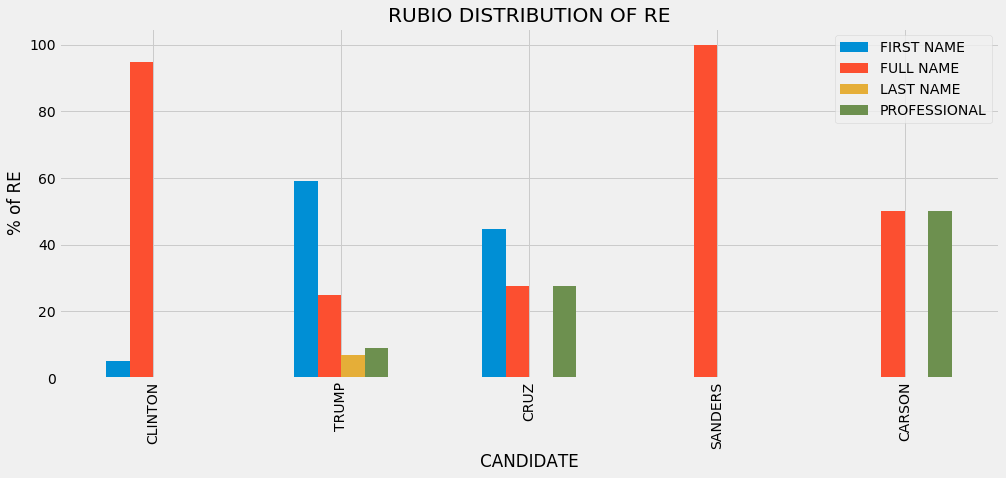

In [215]:
distribution_rubio.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('RUBIO DISTRIBUTION OF RE')
plt.show()

### Moderators

**Next, we'll look at how moderators who moderated multiple debates (preferably both a rebuplican and democratic debate) to see how they referred to same candidates.**

In [ ]:
Muir, Cooper, Wallace, Raddatz, Bash, Hewitt, 

In [172]:
muir = speaker_dfs[17]
muir.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
15823,12-19-15,primary_dem,MUIR,We will be tackling many critical issues righ...,"[(We, PRP), (will, MD), (be, VB), (tackling, V...",[Hillary Clinton]
15854,12-19-15,primary_dem,MUIR,Senator Sanders.,"[[(Senator, NNP), (Sanders, NNP)], (., .)]",[Bernie Sanders]
15864,12-19-15,primary_dem,MUIR,Senator Sanders thank you and thank you all.,"[[(Senator, NNP), (Sanders, NNP)], (thank, IN)...",[Bernie Sanders]
15865,12-19-15,primary_dem,MUIR,We do have a lot of important issues to get he...,"[(We, PRP), (do, VBP), (have, VB), (a, DT), (l...",[]
15866,12-19-15,primary_dem,MUIR,"Senator Sanders, you fired a campaign staffer ...","[[(Senator, NNP), (Sanders, NNP)], (,, ,), (yo...",[Bernie Sanders]


In [173]:
get_entities(muir['Entities'])

{'Martha Raddatz', 'Rick Santorum', 'Ben Carson', 'Bernie Sanders', 'John Kasich', 'TITLE', 'Chris Christie', 'Donald Trump', "Martin O'Malley", 'Hillary Clinton', 'Marco Rubio', 'Jeb Bush', 'Bashar al-Assad', 'Ted Cruz', 'George W. Bush', 'Barack Obama'}

In [174]:
speakers.index('COOPER')

10

In [175]:
cooper = speaker_dfs[10]
cooper.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
5455,10-13-15,primary_dem,COOPER,I'm Anderson Cooper.,"[(I, PRP), ('m, VBP), [(Anderson, JJ), (Cooper...",[Anderson Cooper]
5456,10-13-15,primary_dem,COOPER,Thanks for joining us.,"[(Thanks, NNS), (for, IN), (joining, VBG), (us...",[]
5457,10-13-15,primary_dem,COOPER,We've already welcomed the candidates on stage.,"[(We, PRP), ('ve, VBP), (already, RB), (welcom...",[]
5458,10-13-15,primary_dem,COOPER,They are in place at their podiums.,"[(They, PRP), (are, VBP), (in, IN), (place, NN...",[]
5459,10-13-15,primary_dem,COOPER,"Before we dive into the issues, I want to quic...","[(Before, IN), (we, PRP), (dive, VBP), (into, ...",[]


In [176]:
get_entities(cooper['Entities'])

{'Anderson Cooper', 'TITLE', 'David Muir', 'Wolf Blitzer', 'Donald Trump', "Martin O'Malley", 'Ted Cruz', 'Don Lemon', 'Hillary Clinton', 'Ken Bone', 'James Carter', 'John McCain', 'Ronald Reagan', 'Jim Webb', 'Edward Snowden', 'Barack Obama', 'Franklin D. Roosevelt', 'Dana Bash', 'Bernie Sanders', 'Nancy Reagan', 'Vladimir Putin'}

In [177]:
speakers.index('WALLACE')

14

In [178]:
wallace = speaker_dfs[14]
wallace.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
4043,1-28-16,primary_rep,WALLACE,"Tonight, we're partnering with Google for an ...","[[(Tonight, NNP)], (,, ,), (we, PRP), ('re, VB...",[]
4044,1-28-16,primary_rep,WALLACE,Search Fox News debate on Google any time in t...,"[[(Search, NNP)], [(Fox, NNP), (News, NNP)], (...",[]
4045,1-28-16,primary_rep,WALLACE,You can see the campaigns respond to the debat...,"[(You, PRP), (can, MD), (see, VB), (the, DT), ...",[]
4046,1-28-16,primary_rep,WALLACE,Just go to google.com or open your Google sear...,"[(Just, RB), (go, VB), (to, TO), (google.com, ...",[]
4054,1-28-16,primary_rep,WALLACE,Neurosurgeon Dr. Ben Carson.,"[[(Neurosurgeon, NNP)], [(Dr., NNP)], [(Ben, N...",[Ben Carson]


In [179]:
get_entities(wallace['Entities'])

{'Chris Wallace', 'Mitt Romney', 'John Kasich', 'TITLE', 'Donald Trump', 'David Duke', 'Ted Cruz', 'Ben Carson', 'Lyndon Johnson', 'Kim Davis', 'Hillary Clinton', 'Marco Rubio', 'Scott Walker', 'Jeb Bush', 'Antonin Scalia', 'Ivanka Trump', 'Mitch McConnell', 'Barack Obama', 'Bret Baier', 'Rand Paul', 'Mike Huckabee', 'Chris Christie', 'Kim Jong Un', 'Vladimir Putin'}

In [180]:
speakers.index('RADDATZ')

20

In [181]:
raddatz = speaker_dfs[14]
raddatz.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
4043,1-28-16,primary_rep,WALLACE,"Tonight, we're partnering with Google for an ...","[[(Tonight, NNP)], (,, ,), (we, PRP), ('re, VB...",[]
4044,1-28-16,primary_rep,WALLACE,Search Fox News debate on Google any time in t...,"[[(Search, NNP)], [(Fox, NNP), (News, NNP)], (...",[]
4045,1-28-16,primary_rep,WALLACE,You can see the campaigns respond to the debat...,"[(You, PRP), (can, MD), (see, VB), (the, DT), ...",[]
4046,1-28-16,primary_rep,WALLACE,Just go to google.com or open your Google sear...,"[(Just, RB), (go, VB), (to, TO), (google.com, ...",[]
4054,1-28-16,primary_rep,WALLACE,Neurosurgeon Dr. Ben Carson.,"[[(Neurosurgeon, NNP)], [(Dr., NNP)], [(Ben, N...",[Ben Carson]


In [182]:
get_entities(raddatz['Entities'])

{'Chris Wallace', 'Mitt Romney', 'John Kasich', 'TITLE', 'Donald Trump', 'David Duke', 'Ted Cruz', 'Ben Carson', 'Lyndon Johnson', 'Kim Davis', 'Hillary Clinton', 'Marco Rubio', 'Scott Walker', 'Jeb Bush', 'Antonin Scalia', 'Ivanka Trump', 'Mitch McConnell', 'Barack Obama', 'Bret Baier', 'Rand Paul', 'Mike Huckabee', 'Chris Christie', 'Kim Jong Un', 'Vladimir Putin'}

In [183]:
speakers.index('BASH')

23

In [184]:
bash = speaker_dfs[23]
bash.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
5888,10-13-15,primary_dem,BASH,"Governor Chafee, you were the only Republican...","[[(Governor, NNP)], [(Chafee, NNP)], (,, ,), (...",[]
5889,10-13-15,primary_dem,BASH,You say Secretary Clinton should be disqualifi...,"[(You, PRP), (say, VBP), [(Secretary, NNP), (C...",[Hillary Clinton]
5890,10-13-15,primary_dem,BASH,She has since said that her vote was a mistake.,"[(She, PRP), (has, VBZ), (since, IN), (said, V...",[]
5891,10-13-15,primary_dem,BASH,Why isn't that good enough?,"[(Why, WRB), (is, VBZ), (n't, RB), (that, RB),...",[]
5897,10-13-15,primary_dem,BASH,"Secretary Clinton, he's questioning your judg...","[[(Secretary, NNP), (Clinton, NNP)], (,, ,), (...",[Hillary Clinton]


In [185]:
get_entities(bash['Entities'])

{'Jeb Bush', 'Lindsey Graham', 'Ben Carson', 'Bernie Sanders', 'John Kasich', 'TITLE', 'Rand Paul', 'Chris Christie', 'Donald Trump', 'Hillary Clinton', 'Marco Rubio', 'Carly Fiorina', 'Ted Cruz', 'Barack Obama'}

In [186]:
speakers.index('HEWITT')

28

In [187]:
hewitt = speaker_dfs[28]
hewitt.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
14212,12-15-15,primary_rep,HEWITT,"Senator Cruz, you've said you disagree with M...","[[(Senator, NNP), (Cruz, NNP)], (,, ,), (you, ...","[Donald Trump, Ted Cruz]"
14213,12-15-15,primary_rep,HEWITT,I don't want a cage match; you've tweeted you ...,"[(I, PRP), (do, VBP), (n't, RB), (want, VB), (...",[]
14214,12-15-15,primary_rep,HEWITT,"But Republican primary voters deserve to know,...","[(But, CC), [(Republican, NNP)], (primary, JJ)...",[Donald Trump]
14215,12-15-15,primary_rep,HEWITT,Would you spell that out with us?,"[(Would, MD), (you, PRP), (spell, VB), (that, ...",[]
14222,12-15-15,primary_rep,HEWITT,So you're saying you disagree because he's to...,"[(So, RB), (you, PRP), ('re, VBP), (saying, VB...",[]


In [188]:
get_entities(hewitt['Entities'])

{'Mitt Romney', 'Ben Carson', 'Jake Tapper', 'Winston Churchill', 'Ronald Reagan', 'John Kasich', 'TITLE', 'Rand Paul', 'Vladimir Putin', 'Chris Christie', 'Donald Trump', 'Wolf Blitzer', 'Marco Rubio', 'Hillary Clinton', 'Jeb Bush', 'Carly Fiorina', 'Hugh Hewitt', 'Bashar al-Assad', 'Ted Cruz', 'Barack Obama'}

In [ ]:
HEWITT, BASH, 